<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

Github link:

**1. Dataset Selection and Preprocessing**

***Choose a publicly available dataset suitable for a regression problem***

In [ ]:
# Dataset is about annual spending on different product categories for customers of a wholesale distributor.

import pandas as pd

df = pd.read_csv('Wholesale_customers_data.csv')
df.head()

# I will use K-Means to segment customers based on their spending behavior.


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Horeca,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


***Cleaning data by handling missing values and removing duplicates***

In [ ]:
print(f"Missing values:\n{df.isnull().sum()}")

# No missing values

Missing values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [ ]:
print("Number of duplicate rows:",{df.duplicated().sum()})

# No duplicates

Number of duplicate rows: {np.int64(0)}


In [ ]:
print(f"Data types:\n{df.dtypes}")

Data types:
Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object


In [ ]:
print(f"Statistical summary:\n{df.describe()}")

Statistical summary:
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


***One-hot encoding for categorical variables (if applicable)***

In [ ]:
# Converting the categorical values into binary

df = pd.get_dummies(df, columns=['Channel', 'Region'], drop_first=True)   # Avoid multicollinearity by dropping one dummy column per category.


In [ ]:
# Convert the dummy columns to integers
df= df.astype(int)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_Other
0,12669,9656,7561,214,2674,1338,1,0,1
1,7057,9810,9568,1762,3293,1776,1,0,1
2,6353,8808,7684,2405,3516,7844,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,1


In [ ]:
df.dtypes

,0
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64
Channel_Retail,int64
Region_Oporto,int64
Region_Other,int64


***Feature scaling (if needed)***

***Apply any necessary transformations and normalize or standardize the data as required for your algorithms.***

In [ ]:
# Standardize numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)   #Numpy array
df_scaled

array([[ 0.05293319,  0.52356777, -0.04111489, ...,  1.44865163,
        -0.34582203,  0.62642243],
       [-0.39130197,  0.54445767,  0.17031835, ...,  1.44865163,
        -0.34582203,  0.62642243],
       [-0.44702926,  0.40853771, -0.0281571 , ...,  1.44865163,
        -0.34582203,  0.62642243],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ...,  1.44865163,
        -0.34582203,  0.62642243],
       [-0.13538389, -0.51753572, -0.60251388, ..., -0.69029709,
        -0.34582203,  0.62642243],
       [-0.72930698, -0.5559243 , -0.57322717, ..., -0.69029709,
        -0.34582203,  0.62642243]])

**2. Clustering**

***Apply at least two clustering techniques (e.g., K-means clustering, Hierarchical clustering).***

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np



***Determine the optimal number of clusters for each technique (use methods like the Elbow method, Silhouette score).***

K-means clustering

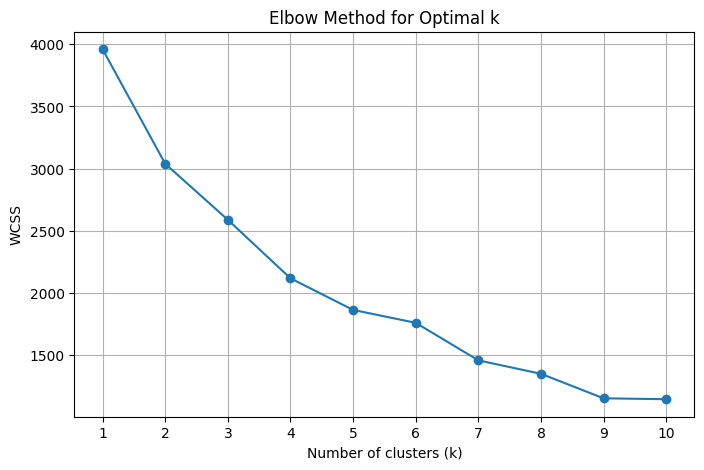

In [ ]:
# Elbow Method to find optimal K

# Using standardized data is stored in df_scaled
wcss = []  # Within-cluster sum of squares

# Try different numbers of clusters (from 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# k=9 is the optimal k based on the chart with the Elbow point

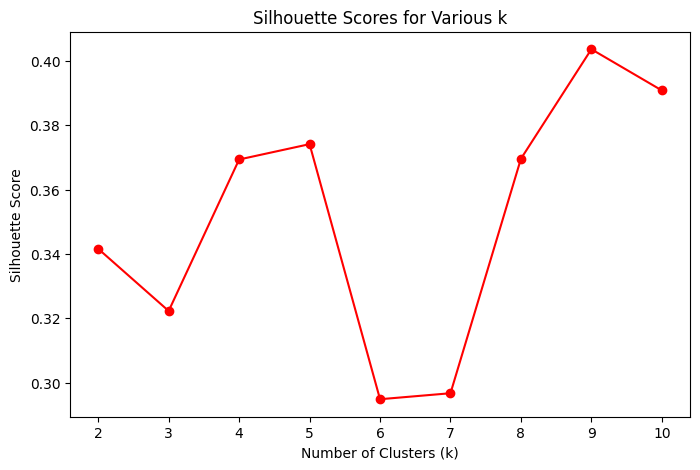

In [ ]:
# Silhouette Scores to find optimal k for K = 2 to 10

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8,5))
plt.plot(range(2, 11), silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various k')
plt.show()


# Silhouette score also shows k=9 clusters is the optimal k since it has the highest score at 0.4

Hierarchical Clustering

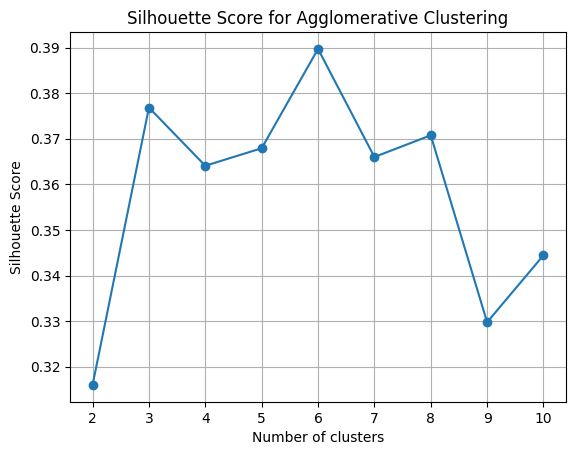

In [ ]:
# Silhouette Scores to find optimal k

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

scores = []
K = range(2, 11)
for k in K:
    hc = AgglomerativeClustering(n_clusters=k)
    hc_labels = hc.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, hc_labels)
    scores.append(score)

plt.plot(K, scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Agglomerative Clustering")
plt.grid(True)
plt.show()

# k=6 is the optimal k for hierarchical clustering since it has the highest silhouette score at 0.39

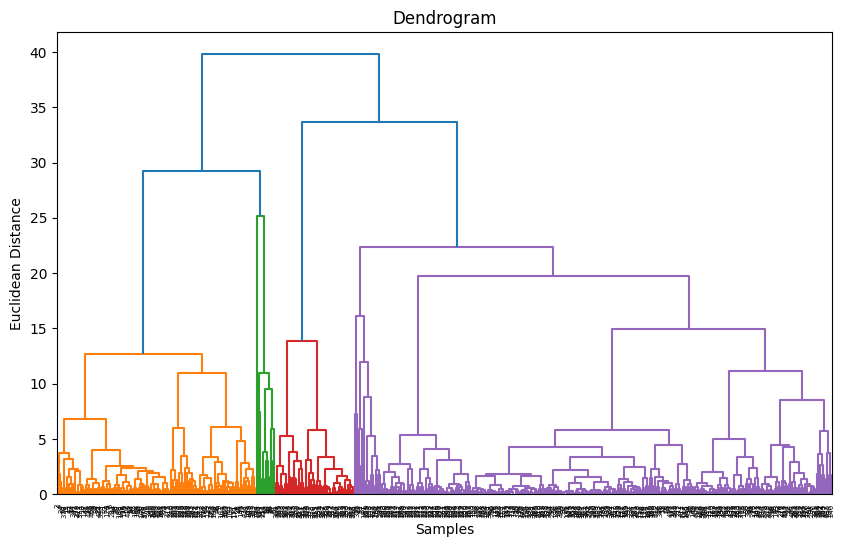

In [ ]:
# Dendogram

import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()


***Present/Visualize the clusters formed.***

K-means clustering

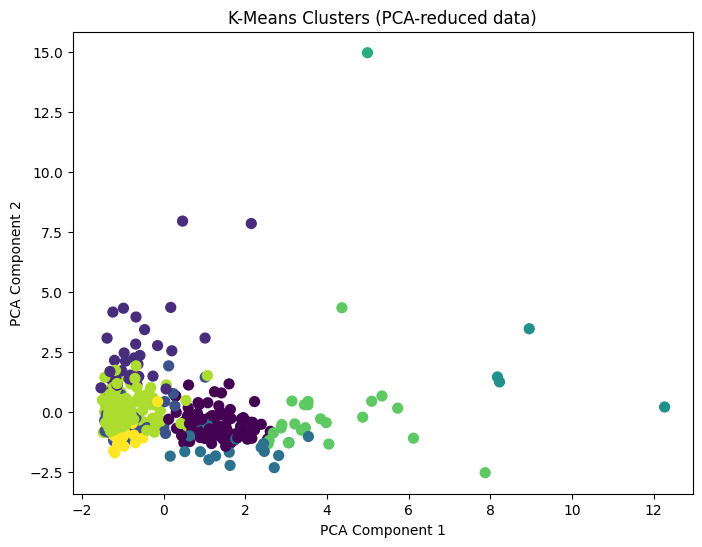

In [ ]:

kmeans = KMeans(n_clusters=9, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# 2D PCA for visualization
from sklearn.decomposition import PCA

# Dimensionality Reduction with PCA will reduce the features to 2 principal components since we have mulitple columns
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clusters (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Hierarchical Clustering

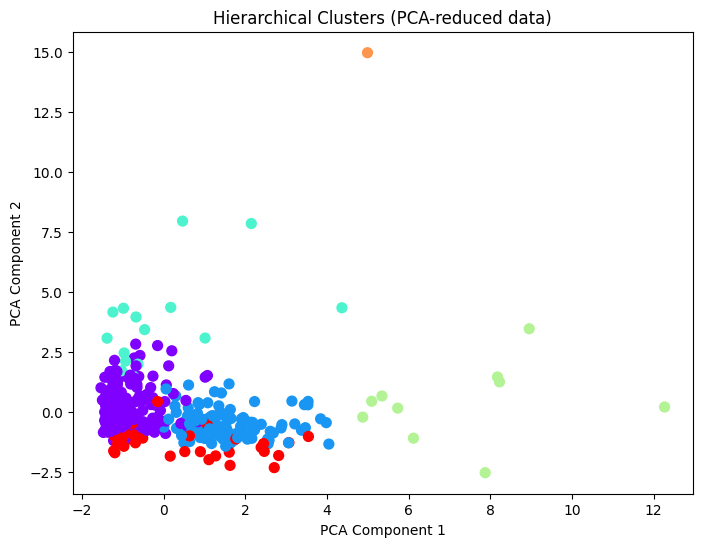

In [ ]:
# Applying Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=6)
hc_labels = hc.fit_predict(df_scaled)

# Visualize with PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=hc_labels, cmap='rainbow', s=50)
plt.title("Hierarchical Clusters (PCA-reduced data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


**3. Dimensionality Reduction**

***Implement a dimensionality reduction technique (PCA, t-SNE)***



In [ ]:
# Answered in Question 2


***Visualize the high-dimensional data in two or three dimensions.***

In [ ]:
# Answered in Question 2

**4. Model Evaluation**

***Evaluate the models using appropriate metrics (e.g., Silhouette score).***




In [ ]:

score_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means (k=9): {score_kmeans:.2f}")


Silhouette Score for K-Means (k=9): 0.40


In [ ]:
score_hc = silhouette_score(df_scaled, hc_labels)
print(f"Silhouette Score for Hierarchical Clustering (k=6): {score_hc:.2f}")


Silhouette Score for Hierarchical Clustering (k=6): 0.39


***Interpret and document the results.***



*   Both models yield moderate separation between clusters (scores close to 0.40).
*   Based on Silhouette Score evaluation, K-Means with 9 clusters slightly outperforms Hierarchical Clustering with 6 clusters (0.40 vs. 0.39). Although the scores are moderate, K-Means is slightly better at forming distinct clusters for this dataset and may be more appropriate for customer segmentation.



**5. Deployment and Monitoring**

***Discuss a hypothetical scenario where your best-performing model is deployed to production.***


*  Save the trained model using joblib or pickle.
*  Build an API (Using Flask or FastAPI) to load the model and preprocessing pipeline inside the API.
*  Deploy to a Cloud Platform like AWS
*  Secure and Scale
*  Monitor the model
*  Enable Continuous Improvement by scheduling regular model retraining with new data.
*  Continuous Integration / Continuous Deployment

***Include potential challenges in deployment, such as latency, scalability, and maintenance.***


*   Real world data may change over time like new products or regions affecting model accuracy.

    To avoid that we can: Set up alerts if prediction confidence or accuracy drops.

*   If the model is not retrained regularly, it may no longer reflect current trends.

    To avoid that we can: Schedule periodic retraining using new data.

*  The production input might differ in structure, format or have misisng values.

    To avoid that we can: Implement input validation and schema checks before making predictions.



***Propose strategies for model monitoring and updating as new data becomes available.***

1. Prediction Monitoring
*   Track these model outputs:

      Class distribution

      Confidence scores: Monitor prediction confidence levels over time. A consistent drop may signal that the model is degrading in accuracy.
      
      Prediction latency: Measure how long the model takes to respond. Increased latency could indicate performance bottlenecks.

2. Retraining Triggers
*   Retrain the model when:

      Drift is detected

      Accuracy drops

      Business rules change

